In [12]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [13]:
%matplotlib inline

In [14]:
#define path

path = 'C:/Users/Owner/Documents/Chocolate Bar Analysis/02 Data/Original Data'

In [15]:
#Import data

df = pd.read_csv(os.path.join(path, 'Chocolate_bar_ratings.csv'))

# Correlation Matrix Heatmap

In [16]:
# Create a correlation matrix using pandas

df.corr()

,ref,review_date,cocoa_percent,number_of_ingredients,rating
ref,1.000000,0.993202,0.038078,-0.354130,0.088725
review_date,0.993202,1.000000,0.037358,-0.358502,0.090811
cocoa_percent,0.038078,0.037358,1.000000,-0.181758,-0.075482
number_of_ingredients,-0.354130,-0.358502,-0.181758,1.000000,-0.098706
rating,0.088725,0.090811,-0.075482,-0.098706,1.000000


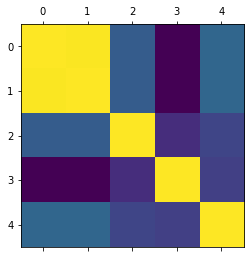

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

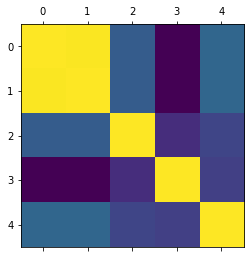

In [18]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png")

In [19]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Owner\\Documents\\Chocolate Bar Analysis\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

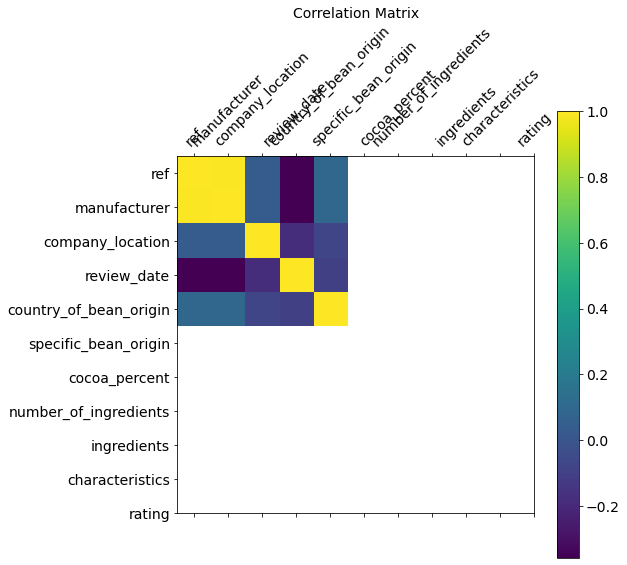

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [23]:
df.columns

Index(['ref', 'manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin', 'cocoa_percent',
       'number_of_ingredients', 'ingredients', 'characteristics', 'rating'],
      dtype='object')

In [27]:
# Create a subset excluding columns

sub = df[['rating', 'cocoa_percent', 'number_of_ingredients']]

In [28]:
sub

,rating,cocoa_percent,number_of_ingredients
0,2.75,0.80,6
1,2.75,0.70,6
2,3.50,0.75,6
3,2.75,0.65,6
4,3.00,0.72,5
...,...,...,...
2496,2.50,1.00,1
2497,2.75,1.00,1
2498,3.50,1.00,1
2499,3.00,1.00,1


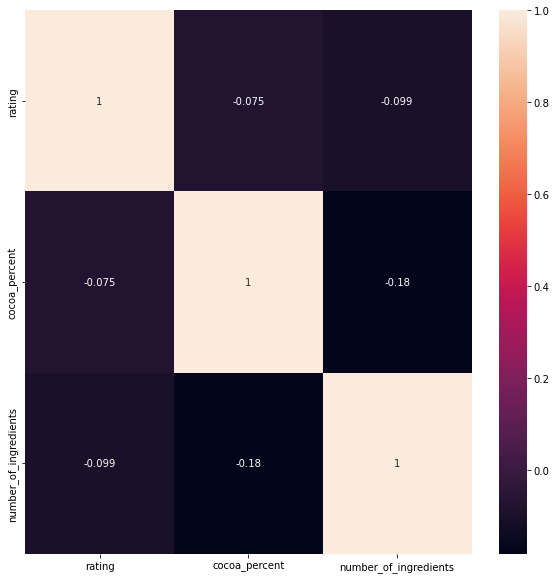

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


There is a weak negative correlation of -0.075 between rating and cocoa_percent. There is a weak negative correlation of -0.099 between number of ingredients and rating. There is also a weak negative correlation of -0.18 between number of ingredients and cocoa_percent. 

# Scatterplot

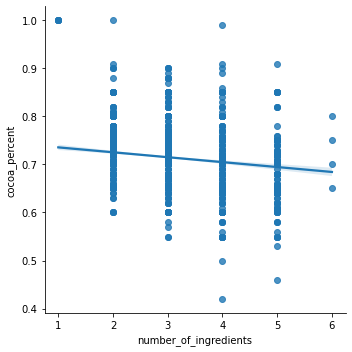

In [32]:
#Create a scatterplot for the "number of ingredients" and 'cocoa percentage' columns in seaborn

sns.lmplot(x = 'number_of_ingredients', y = 'cocoa_percent', data = df)

In the scatterplot you can see there is a weak negative relationship, the trend line isn't very steep, and many points are far from the line. There is a great deal of variability. 

# Pair Plots:

In [33]:
sub_2 = sub[['number_of_ingredients', 'rating', 'cocoa_percent']]

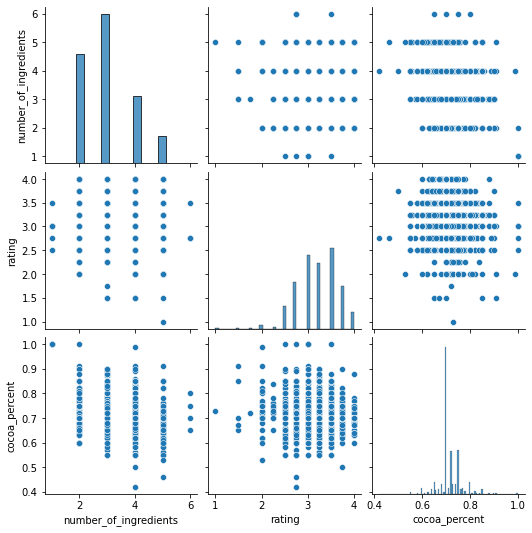

In [34]:
# Create a pair plot 

g = sns.pairplot(sub_2)

It looks like the majority of higher rankings had cocoa percentages between 60% and 80%, I would like to look into that more. 

# Categorical Plot

<AxesSubplot:xlabel='cocoa_percent', ylabel='Count'>

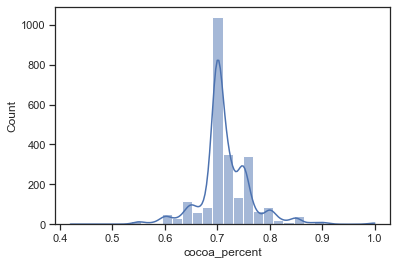

In [56]:
sns.histplot(df['cocoa_percent'], bins = 30, kde = True)

In [61]:
df.loc[df['cocoa_percent'] < .65, 'Percent category'] = 'Low Percent'

In [62]:
df.loc[(df['cocoa_percent'] >= .65) & (df['cocoa_percent'] < .75), 'Percent category'] = 'Middle Percent'

In [63]:
df.loc[df['cocoa_percent'] >= .75, 'Percent category'] = 'High Percent'

In [64]:
df['Percent category'].value_counts(dropna = False)

Middle Percent    1760
High Percent       596
Low Percent        145
Name: Percent category, dtype: int64

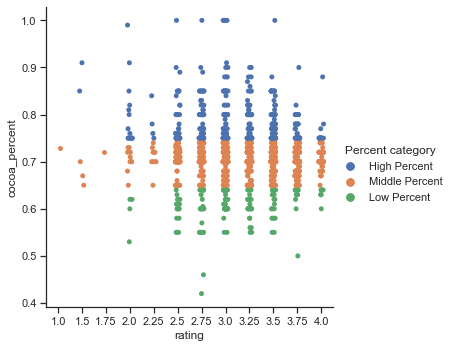

In [67]:
sns.set(style="ticks")
g = sns.catplot(x="rating", y="cocoa_percent", hue="Percent category", data=df)

The middle and high percent of cocoa had a few of lowest ratings. The highest rated candy bars were mostly made up of middle percent. 

# Conclusions

1. It would seem that the highest rated bar had a cocoa percentage between 65% and 75%.

2. I think the ratings are going to be more influenced by the origin of the beans or the manufacturers then they are the ingredients or percentages. 

3. Hypothisis - There will be an area where the beans are grown that will stand out as a high producer of high rated chocolate bars.